In [0]:
#Sigmoid Function
import numpy as np
import matplotlib.pyplot as plt
def sigmoid_array(x):
  return 1/(1+np.exp(-x))

In [22]:
numbers = np.arange(-10,10)
sigmoids = sigmoid_array(numbers)
sigmoids

array([4.53978687e-05, 1.23394576e-04, 3.35350130e-04, 9.11051194e-04,
       2.47262316e-03, 6.69285092e-03, 1.79862100e-02, 4.74258732e-02,
       1.19202922e-01, 2.68941421e-01, 5.00000000e-01, 7.31058579e-01,
       8.80797078e-01, 9.52574127e-01, 9.82013790e-01, 9.93307149e-01,
       9.97527377e-01, 9.99088949e-01, 9.99664650e-01, 9.99876605e-01])

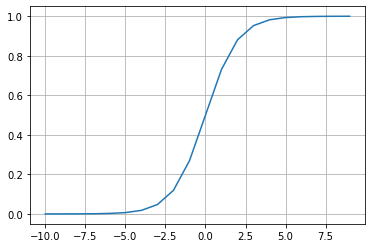

In [23]:
fig,ax = plt.subplots()
ax.plot(numbers,sigmoids)
ax.grid(True)
plt.show()

In [0]:
#tanh function is a nonlinear function that generates outout in range of (-1,1)

In [0]:
def tanh_array(x):
  return np.tanh(x)
  

In [26]:
numbers = np.arange(-10,10)
tanh = tanh_array(numbers)
tanh

array([-1.        , -0.99999997, -0.99999977, -0.99999834, -0.99998771,
       -0.9999092 , -0.9993293 , -0.99505475, -0.96402758, -0.76159416,
        0.        ,  0.76159416,  0.96402758,  0.99505475,  0.9993293 ,
        0.9999092 ,  0.99998771,  0.99999834,  0.99999977,  0.99999997])

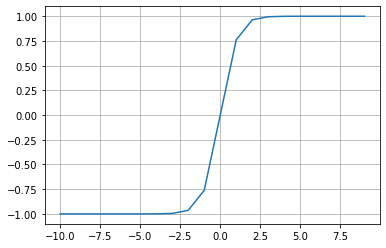

In [27]:
fig,ax = plt.subplots()
ax.plot(numbers,tanh)
ax.grid(True)
plt.show()

In [0]:
#ReLu stands for Rectifier Linear Units, it is given as R(x)= Max(0,x) , so ReLu function gives output zero for all negative values , otherwise it is same as given number

In [0]:
def relu_array(x):
  return np.maximum(0,x);

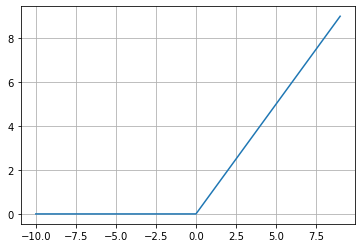

In [32]:
relu = relu_array(numbers)
fig,ax = plt.subplots()
ax.plot(numbers, relu)
ax.grid(True)
plt.show()

In [35]:
#Classify images of clothing
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.2.0


In [39]:
#using fashion data set that consists of 70000 gray scale images of 10 categories
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [40]:
#images are bascially 28+28 numpy arrays , values ranging from 0 to 255 
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
train_images.shape

(60000, 28, 28)

In [41]:
test_images.shape

(10000, 28, 28)

In [42]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

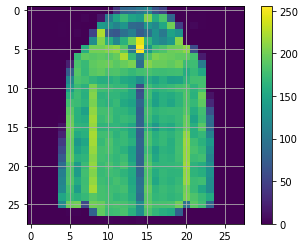

In [49]:
#Step 2 : Data preprocessing
plt.figure()
plt.imshow(train_images[240])
plt.colorbar()
plt.grid(True)
plt.show()

In [0]:
train_images = train_images/255.0 # need to scale the values to a range(0,1)
test_images = test_images/255.0

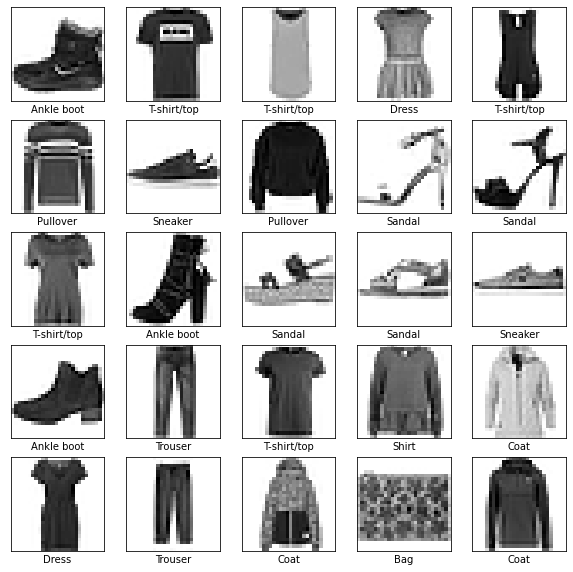

In [55]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()  
             

In [0]:
#Setting up the layers ( Building the model)
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128,activation = 'relu'),
                          keras.layers.Dense(10)])



In [0]:
#Compiling the model
model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])


In [61]:
#Train the model
model.fit(train_images,train_labels,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1047 - accuracy: 0.6531
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6476 - accuracy: 0.7674
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5711 - accuracy: 0.7941
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5285 - accuracy: 0.8114
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4995 - accuracy: 0.8232
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4795 - accuracy: 0.8296
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4644 - accuracy: 0.8366
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4517 - accuracy: 0.8409
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4413 - accuracy: 0.8444
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.433

In [62]:
#Evulate accuracy
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose = 2)
print("Test Accuracy",test_acc)

313/313 - 0s - loss: 0.4594 - accuracy: 0.8336
Test Accuracy 0.8335999846458435


In [0]:
#Making predictions 
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [0]:
predictions = probability_model.predict(test_images)

In [65]:
predictions[26]

array([6.5607647e-04, 9.7853699e-05, 7.9745136e-02, 1.1852122e-03,
       3.1659538e-01, 9.7842303e-09, 6.0005206e-01, 8.1557916e-14,
       1.6682496e-03, 6.1483701e-10], dtype=float32)

In [68]:
#to find the max values of array
np.argmax(predictions[0])

9

In [69]:
test_labels[0]

9

In [0]:
#Graph this look at the full set of 10 classes
def plot_image(i,predictions_array,true_labels,img):
  predictions_array,true_label,img = predictions_array,true_labels[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = "blue"
  else:
    color = "red"

    plt.xlabel('{}  {:2.0f}% ({})'.format(class_names[predicted_label],
                                          100*np.max(predictions_array),
                                          class_names[true_label],
                                          color = color))
    
def plot_value_array(i,predictions_array,true_label):
  predictions_array,true_label = predictions_array,true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  myplot = plt.bar(range(10),predictions_array,color = 'yellow')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  myplot[predicted_label].set_color('red')
  myplot[true_label].set_color('blue')

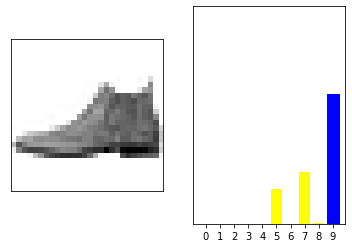

In [73]:
#verifying predictions
i = 0
plt.figure(figsize = (6,4))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()